<div class="alert alert-block alert-warning"><b><font size=5>
<b>ASA GROUP ASSIGNMENT- GROUP-17
<br><br><font size=4><font color=#FF4500>
1. ARCHIT SRIVASTAVA_12120052<br>
2. SRIYA PARUCHURI_12120019<br>
3. JHANVI SHARMA_12120086<br>
    </div>

In [61]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
#Importing libraries for visualization
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
#Importing Libraries for execution & data cleaning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

import lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from imblearn.over_sampling import SMOTE

In [118]:
df = pd.read_csv('C:/ISB/Term-04/Stats-03/Assignment/Group/file-17.csv')
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1255,4030-VPZBD,Female,0,No,No,2,No,No phone service,DSL,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,30.90,59.05,Yes
1,1138,0774-IFUVM,Male,0,Yes,Yes,11,Yes,Yes,DSL,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),65.15,723.35,No
2,1249,2833-SLKDQ,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,45.05,45.05,Yes
3,4263,2121-JAFOM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.55,8312.4,No
4,5871,0733-VUNUW,Male,0,No,No,24,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.65,1400.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4211,2034-CGRHZ,Male,1,No,No,24,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.95,2496.7,Yes
4997,968,3429-IFLEM,Female,0,No,No,71,Yes,No,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),77.35,5550.1,No
4998,5890,0383-CLDDA,Female,0,No,No,69,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.35,5897.4,No
4999,714,4312-KFRXN,Male,0,Yes,No,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1710.9,No


In [6]:
# Checking for dataset type & counts in each field.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5001 non-null   int64  
 1   customerID        5001 non-null   object 
 2   gender            5001 non-null   object 
 3   SeniorCitizen     5001 non-null   int64  
 4   Partner           5001 non-null   object 
 5   Dependents        5001 non-null   object 
 6   tenure            5001 non-null   int64  
 7   PhoneService      5001 non-null   object 
 8   MultipleLines     5001 non-null   object 
 9   InternetService   5001 non-null   object 
 10  OnlineSecurity    5001 non-null   object 
 11  OnlineBackup      5001 non-null   object 
 12  DeviceProtection  5001 non-null   object 
 13  TechSupport       5001 non-null   object 
 14  StreamingTV       5001 non-null   object 
 15  StreamingMovies   5001 non-null   object 
 16  Contract          5001 non-null   object 


<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Datatype of Columns such as TotalCharges is in object, hence converting into float.
</div>

In [119]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)
#df["TotalCharges"] = [float(str(i).replace("", "")) for i in df["TotalCharges"]]
#df["TotalCharges"] = df['TotalCharges'].str.replace(' ', '').astype(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [65]:
# Checking the count of Unique values in each column (will be checking for categorical columns)
df.astype('object').describe(include='all').loc['unique', :]

Unnamed: 0            5001
customerID            5001
gender                   2
SeniorCitizen            2
Partner                  2
Dependents               2
tenure                  73
PhoneService             2
MultipleLines            3
InternetService          3
OnlineSecurity           3
OnlineBackup             3
DeviceProtection         3
TechSupport              3
StreamingTV              3
StreamingMovies          3
Contract                 3
PaperlessBilling         2
PaymentMethod            4
MonthlyCharges      1450.0
TotalCharges        4710.0
Churn                    2
Name: unique, dtype: object

In [9]:
# Getting the unique values of each column for further processing
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Unnamed: 0
[1255 1138 1249 ... 5890  714 5364]


customerID
['4030-VPZBD' '0774-IFUVM' '2833-SLKDQ' ... '0383-CLDDA' '4312-KFRXN'
 '9050-QLROH']


gender
['Female' 'Male']


SeniorCitizen
[0 1]


Partner
['No' 'Yes']


Dependents
['No' 'Yes']


tenure
[ 2 11  1 72 24 38  6 64 46 50 52 23  4 30 17 71 37 57 55 10 54 69 15 26
 16 68 51 70 42 61 43 29 18 20 62 53 25 36 67 14 13 47 31  5  7 33 12 41
 65 32 28 34 63 35 59  3 19 40 39 45 66 58 27 21 60 44 49 48  8 22  9 56
  0]


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'Yes' 'No']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['No' 'Yes' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['Yes' 'No' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'Two year' 'One year']


PaperlessBilling
['Yes' 'No']


PaymentMet

In [120]:
# Renaming the string values of "PaymentMethod" for using in further analysis
payment_column = {'Electronic check': 'E-Check' , 'Bank transfer (automatic)': 'BT', 'Mailed check': 'Mailed-Check', 'Credit card (automatic)': 'CC'}
df["PaymentMethod"].replace(payment_column, inplace=True)

In [121]:
#checking for null values
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Dropping the columns in TotalCharges as there are 7 null values.
</div>

In [122]:
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 5000
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4994 non-null   int64  
 1   customerID        4994 non-null   object 
 2   gender            4994 non-null   object 
 3   SeniorCitizen     4994 non-null   int64  
 4   Partner           4994 non-null   object 
 5   Dependents        4994 non-null   object 
 6   tenure            4994 non-null   int64  
 7   PhoneService      4994 non-null   object 
 8   MultipleLines     4994 non-null   object 
 9   InternetService   4994 non-null   object 
 10  OnlineSecurity    4994 non-null   object 
 11  OnlineBackup      4994 non-null   object 
 12  DeviceProtection  4994 non-null   object 
 13  TechSupport       4994 non-null   object 
 14  StreamingTV       4994 non-null   object 
 15  StreamingMovies   4994 non-null   object 
 16  Contract          4994 non-null   object 


<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>EDA</p>
</div>

In [123]:
#Checking the distibution of numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4994.0,3541.682219,2028.105660,0.0,1805.2500,3550.500,5296.750,7042.0
SeniorCitizen,4994.0,0.161594,0.368115,0.0,0.0000,0.000,0.000,1.0
tenure,4994.0,32.149579,24.561042,1.0,8.2500,28.000,55.000,72.0
MonthlyCharges,4994.0,64.993542,30.019107,18.7,36.7000,70.300,90.100,118.6
TotalCharges,4994.0,2274.009592,2263.095125,18.8,382.9875,1408.925,3778.175,8684.8


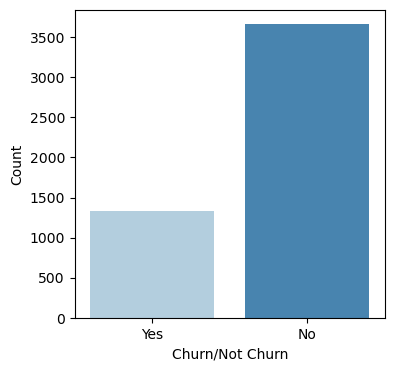

In [124]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1).set(xlabel='Churn/Not Churn', ylabel='Count')

In [125]:
non_active = len(df[df['Churn']=="Yes"])
active = len(df[df['Churn']=="No"])
per_non_active= round((non_active/(non_active+active))*100,2)
per_active= round((active/(non_active+active))*100,2)

print("Non-Churn Users & Churn Users are ",per_active,"& ", per_non_active,"respectively")

Non-Churn Users & Churn Users are  73.29 &  26.71 respectively


In [126]:
## Defining multiple count bar plots of Churn of different parameters.

def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

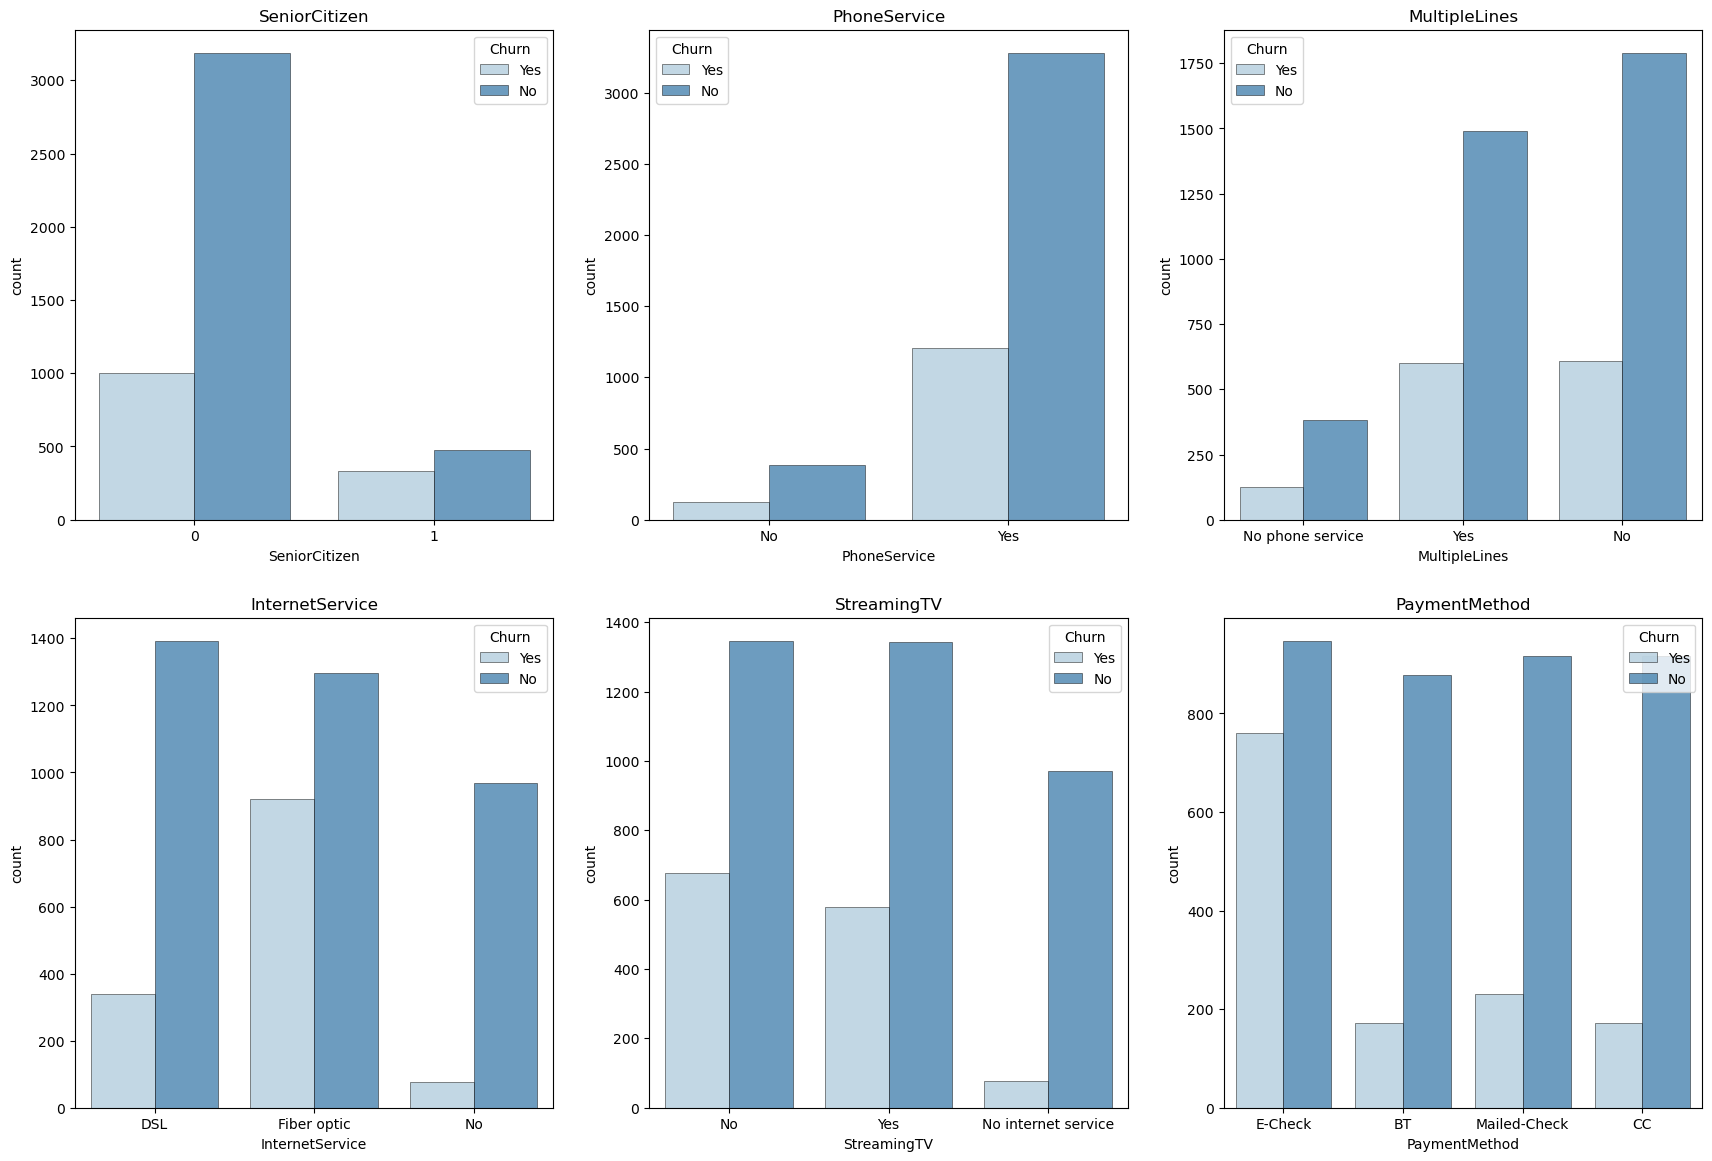

In [127]:
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}
countplot("Churn", ['SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'PaymentMethod'], df)

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>From the above observations, senior citizens have higher rate of churn.This may also be due to the death rate.<br> Customers using Fiberoptic services as internet are having very high proportion of churn. <br> Customers paying with e-check are most suspectible to churn.
</div>

C:\Users\archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='tenure'>

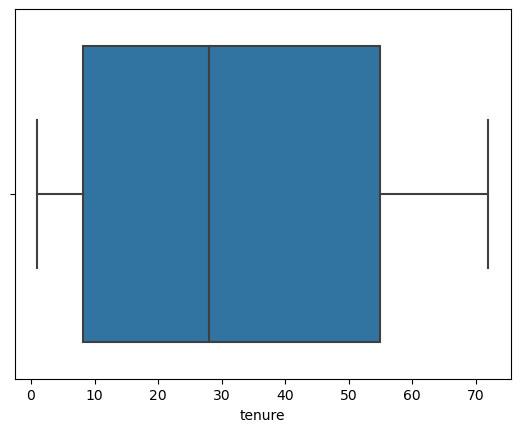

In [18]:
sns.boxplot(df.tenure)

C:\Users\archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='MonthlyCharges'>

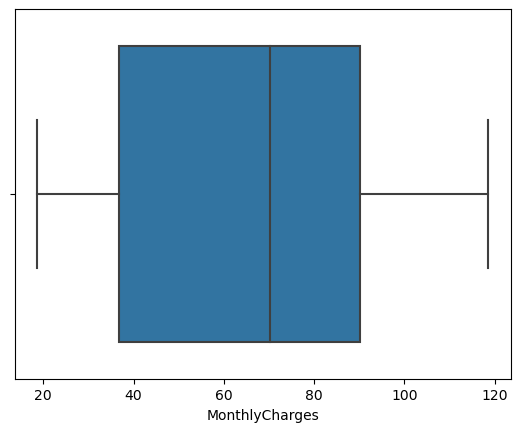

In [20]:
sns.boxplot(df.MonthlyCharges)

C:\Users\archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='TotalCharges'>

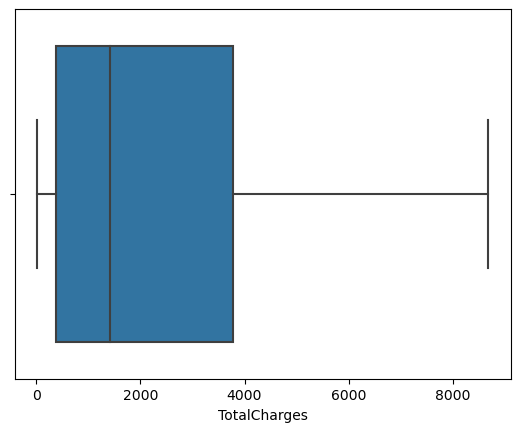

In [19]:
sns.boxplot(df.TotalCharges)

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>There seems to be no outliers in the data set for tenure, totalcharges & monthly charges

In [128]:
#Dropping columns of no use
df = df.drop(columns=['customerID','Unnamed: 0'])
df_1 = df.copy(deep=True)
df_2 = df.copy(deep=True)

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>LABEL ENCODING OF BINARY VARIABLE & REST CATAGORICAL VARIABLE TO OHE</p>
</div>

In [129]:
# Label encoding for identified columns.

categorical_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col)) 
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})


In [130]:
df_1['gender'] = df_1['gender'].map({'Female': 1, 'Male': 0})

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,No,No,2,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,E-Check,30.90,59.05,Yes
1,0,0,Yes,Yes,11,Yes,Yes,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,BT,65.15,723.35,No
2,0,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed-Check,45.05,45.05,Yes
3,1,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,CC,115.55,8312.40,No
4,0,0,No,No,24,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,BT,55.65,1400.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,1,No,No,24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,CC,102.95,2496.70,Yes
4997,1,0,No,No,71,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,CC,77.35,5550.10,No
4998,1,0,No,No,69,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,CC,85.35,5897.40,No
4999,0,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed-Check,25.40,1710.90,No


In [131]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,2,0,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,1,E-Check,30.90,59.05,1
1,0,0,1,1,11,1,Yes,DSL,Yes,No,No,No,Yes,No,Month-to-month,1,BT,65.15,723.35,0
2,0,0,0,0,1,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Mailed-Check,45.05,45.05,1
3,1,0,1,0,72,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,1,CC,115.55,8312.40,0
4,0,0,0,0,24,1,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,1,BT,55.65,1400.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,1,0,0,24,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,CC,102.95,2496.70,1
4997,1,0,0,0,71,1,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,0,CC,77.35,5550.10,0
4998,1,0,0,0,69,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,1,CC,85.35,5897.40,0
4999,0,0,1,0,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed-Check,25.40,1710.90,0


In [132]:
# Checking after label encoding, what is the value of YES & NO.

non_active = len(df[df['Churn']==1])
active = len(df[df['Churn']==0])
per_non_active= round((non_active/(non_active+active))*100,2)
per_active= round((active/(non_active+active))*100,2)

print("Non-Churn Users =1 & Churn Users =0 are ",per_active,"& ", per_non_active,"respectively")


Non-Churn Users =1 & Churn Users =0 are  73.29 &  26.71 respectively


In [133]:
# One-Hot-Encoding for other categorical columns columns.
OHE_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=OHE_features) 

In [ ]:
# Checking all new columns for if any column have data less than 4994
df

 <div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>STANDARDIZING the variables with Min Max Scalar & Checking for Correlation
</div>

In [134]:
# Min-Max-Scaling for identified columns.
from sklearn.preprocessing import MinMaxScaler
col_mm = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_col_mm = pd.DataFrame(df, columns=col_mm)
df_remaining_col = df.drop(columns=col_mm)

mms = MinMaxScaler()
rescaled_col = mms.fit_transform(df_col_mm)

df_scaled_col = pd.DataFrame(rescaled_col, columns=col_mm, index=df_remaining_col.index)

df = pd.concat([df_remaining_col, df_scaled_col], axis=1)

<AxesSubplot:>

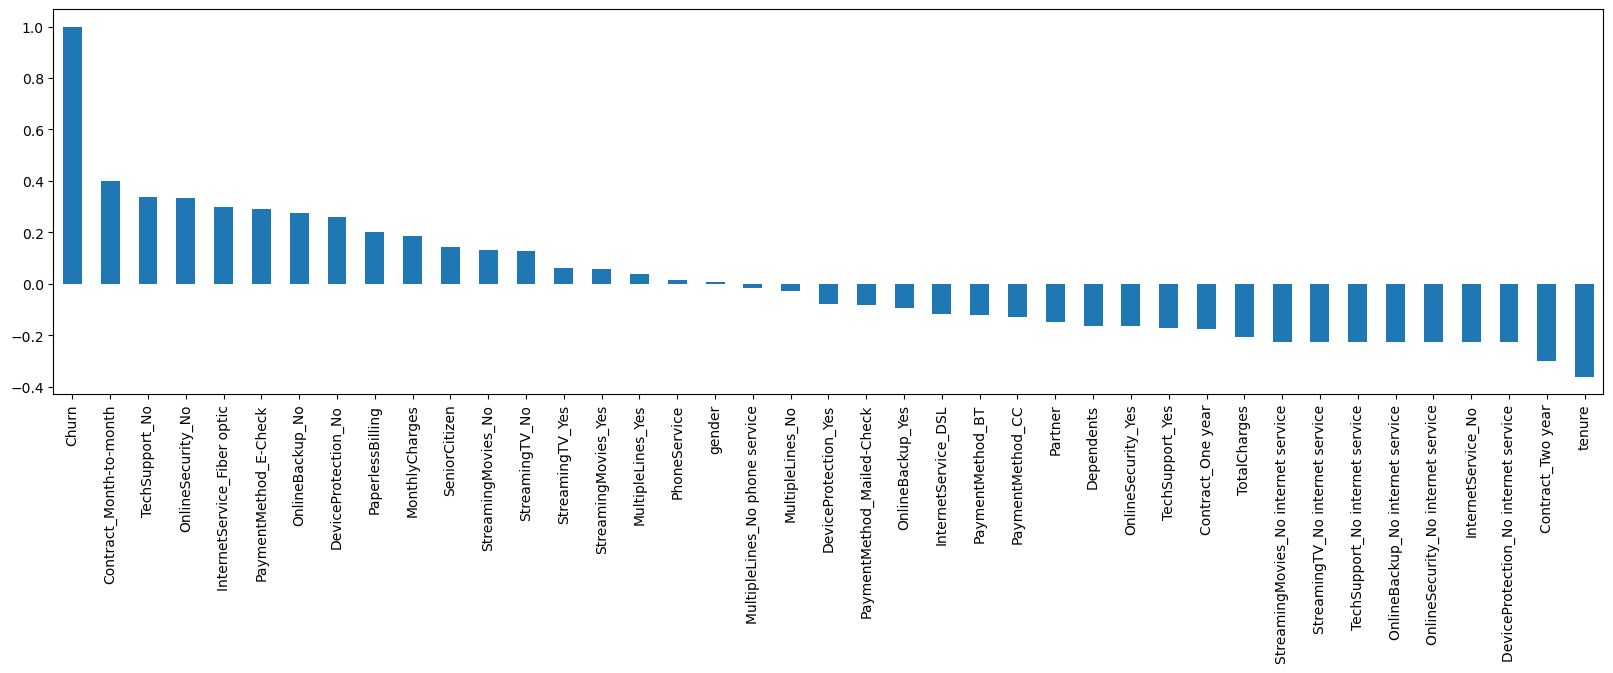

In [135]:
# Checking relationship of other features with Churn feature.
plt.figure(figsize=(16,10))
df.corr(method='pearson', min_periods=1)
df.corr(method='pearson')['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Multiple Lines, Streaming TV & Gender seems to be least correlated to Chrun.</div>

<AxesSubplot:>

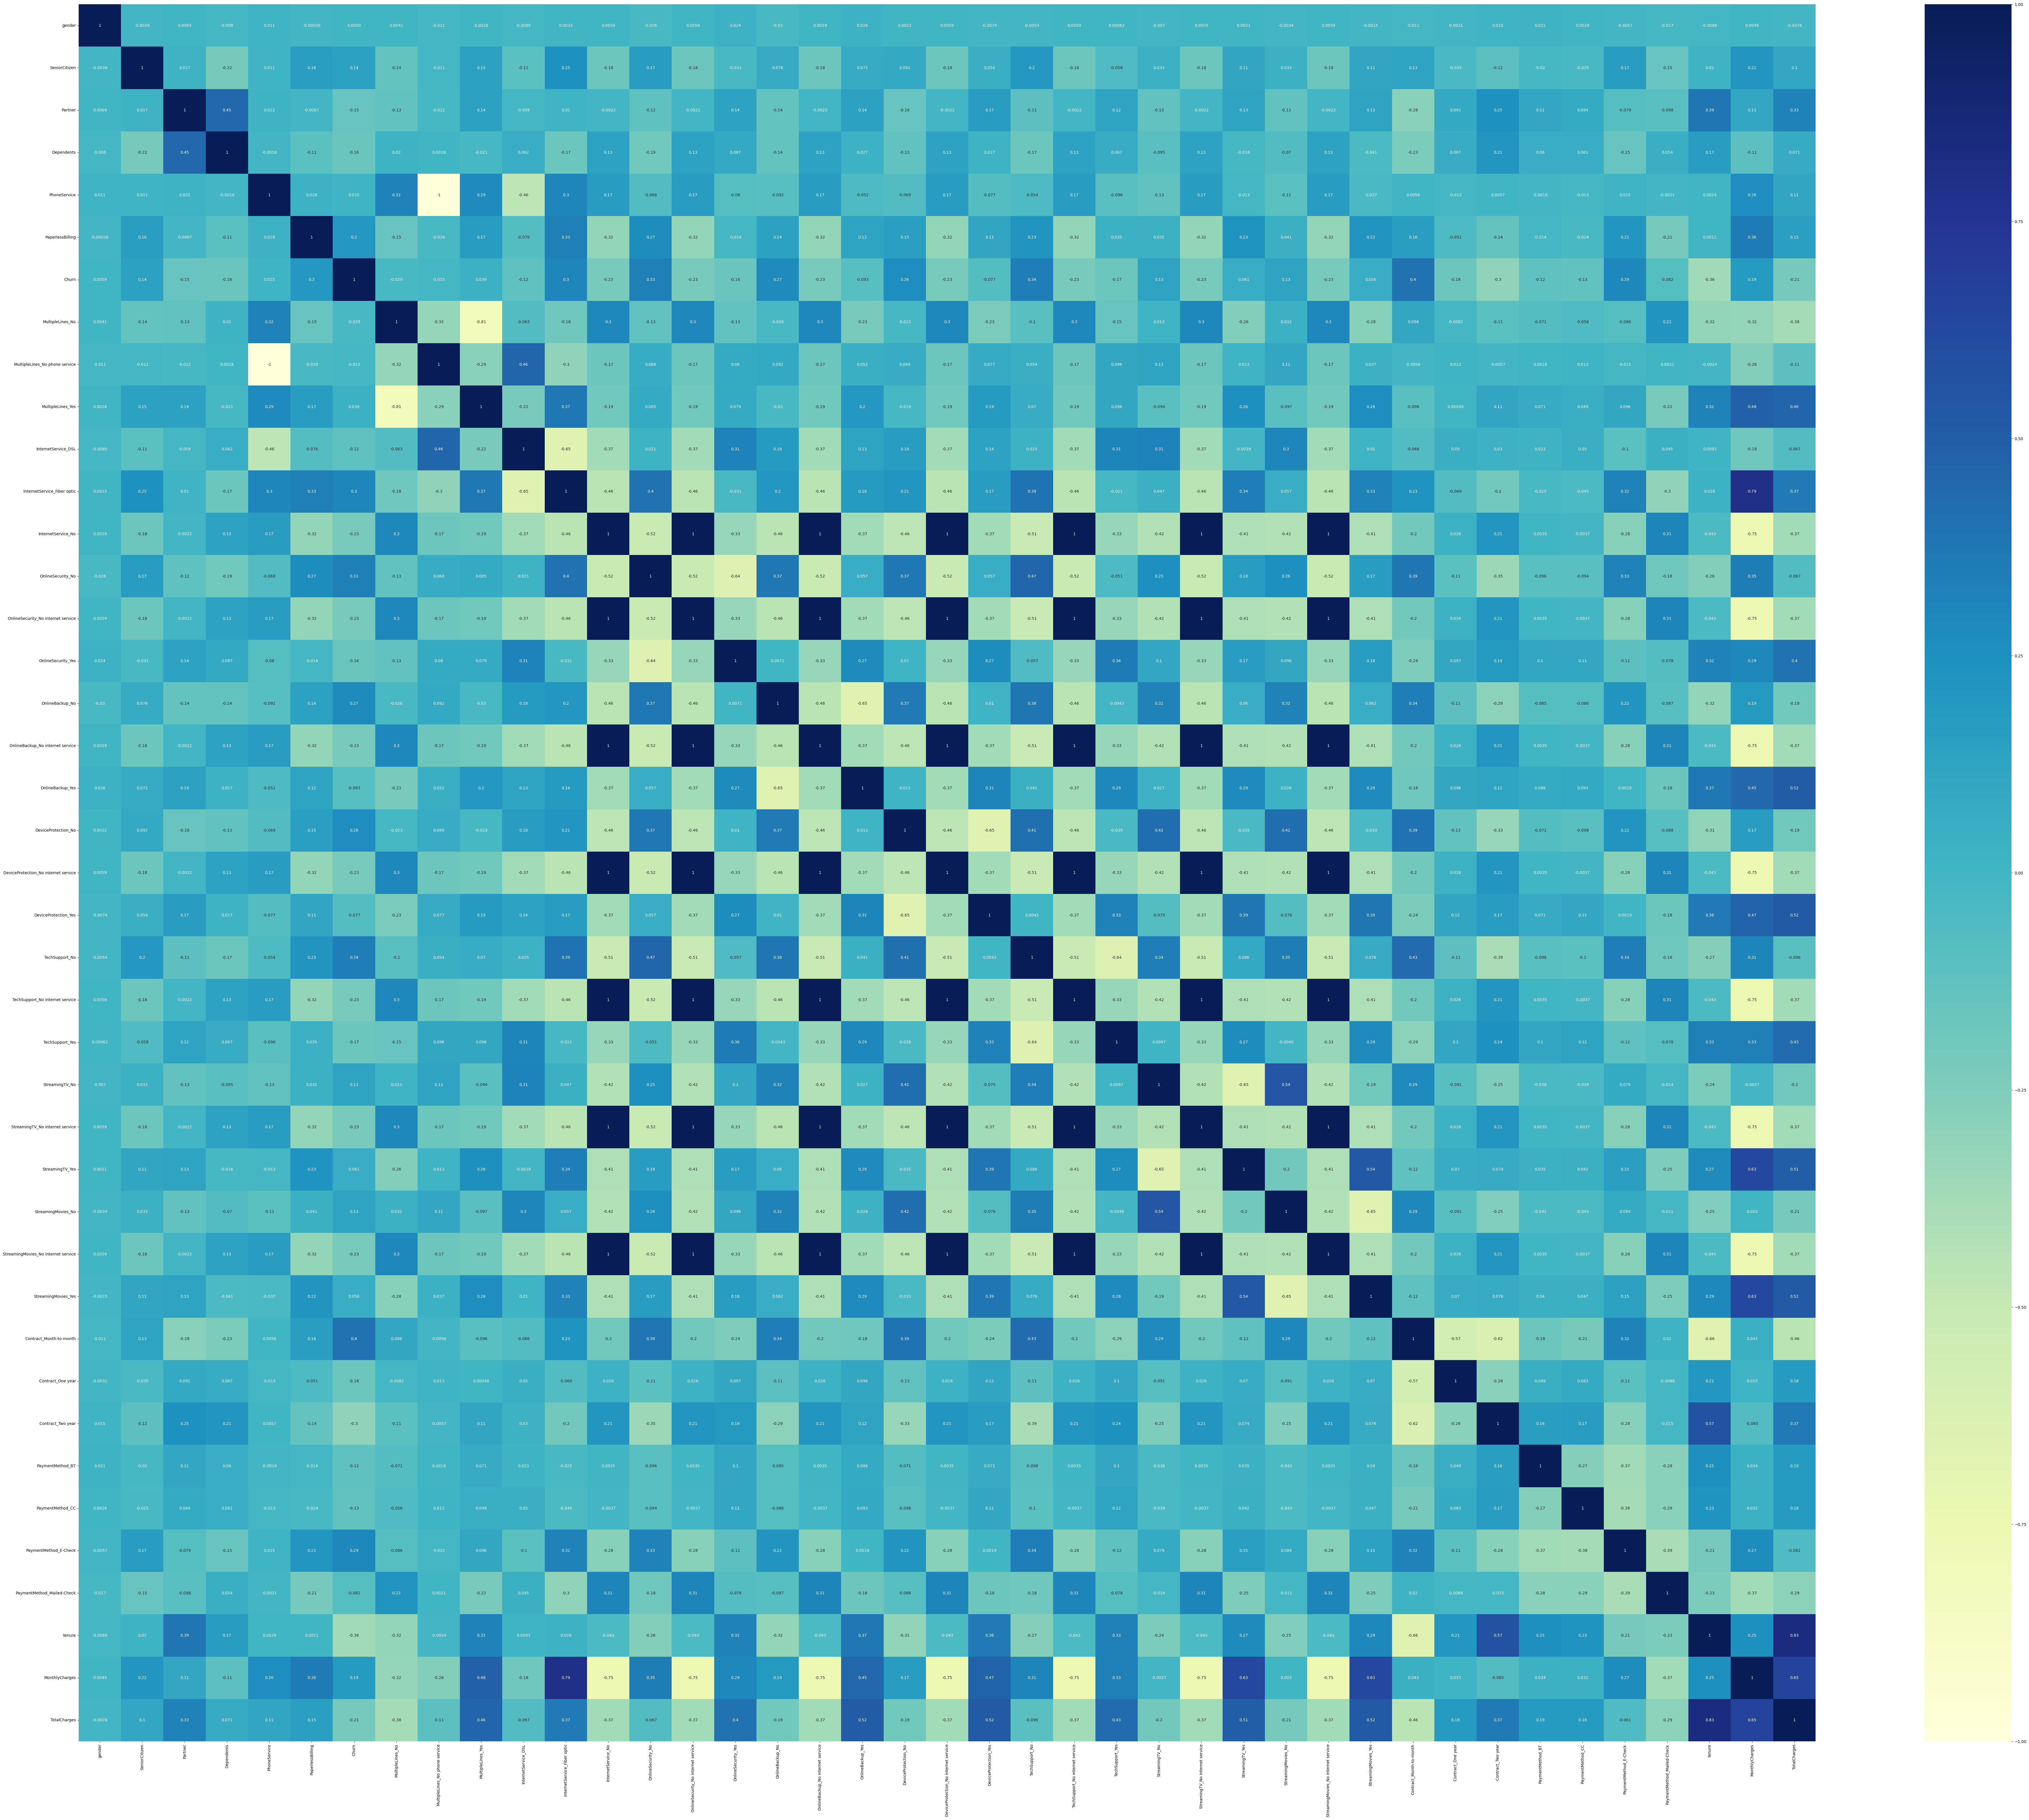

In [139]:
plt.figure(figsize=(100,80))
sns.heatmap(df.corr(),square=True,cmap="YlGnBu",annot=True)

 <div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>Working on Questions Now
</div>

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>
Q1. <br> <br>Build a prediction model for predicting churn, using both discriminant analysis and logistic regression. You may consider using the appropriate explanatory variables. If necessary, create additional variables using the existing variables. </div>

<div class="alert alert-block alert-success">
    <font size=4><font color=#808000><b>
I. LDA </div>

In [140]:
# Splitting the dataset with all features as X except the target feature as y

import sklearn
X_ = df.drop("Churn", axis=1)
y_ = df.Churn

#Doing over sampling as data is highly imbalanced.

oversample  = SMOTE()
X,y=oversample.fit_resample(X_,y_)
print(X.shape, y.shape)


(7320, 40) (7320,)


In [141]:
model_lda = LinearDiscriminantAnalysis(n_components=1)
lda_data = model_lda.fit(X, y)
lda_data.coef_

array([[-0.26306772, -0.12965585, -0.2605492 , -0.50028264, -2.49715616,
         0.20178884, -2.70404491, -4.81551617, -2.40300463, -3.21527425,
        -2.1528381 , -2.61493747, -2.03912704, -2.61493747, -2.75295858,
        -2.3985959 , -2.61493747, -2.78029509, -2.44165587, -2.61493747,
        -2.61854607, -2.12708156, -2.61493747, -2.97295121, -2.25343073,
        -2.61493747, -2.03435828, -2.55343738, -2.61493747, -2.33673217,
        -2.73224605, -3.87949798, -3.53813683, -2.99497279, -3.09412378,
        -2.22417734, -2.94276313, -2.72091417,  0.48736883, -0.09631182]])

In [142]:
lda_df1=pd.DataFrame(model_lda.coef_[0].reshape(-1,1),X.columns,columns=["LD1"])
lda_df2=pd.DataFrame(model_lda.intercept_[0].reshape(-1,1),["Bias"],columns=["LD1"])
lda_df = pd.concat([lda_df2, lda_df1], axis=0)
print ('Coefficients of LDA')
lda_df.sort_values(by=['LD1'], ascending=False)

Coefficients of LDA


,LD1
Bias,28.354531
MonthlyCharges,0.487369
PaperlessBilling,0.201789
TotalCharges,-0.096312
SeniorCitizen,-0.129656
Partner,-0.260549
gender,-0.263068
Dependents,-0.500283
StreamingTV_Yes,-2.034358
OnlineSecurity_No,-2.039127


<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Explained in Q2. </div>

In [143]:
## Checking the accuracy of the model

ypred_lda = model_lda.predict(X)
ypred  = pd.DataFrame({"actual":y,"predicted":ypred_lda})

print('Accuracy of LDA model: {:.2f}'.format(accuracy_score(ypred.actual, ypred.predicted)))

Accuracy of LDA model: 0.83


<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Accuracy of the model is good with 83% accuracy. But to really verify the model we need to have other parameters like recall and precision aswell. </div>

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3660
           1       0.81      0.85      0.83      3660

    accuracy                           0.83      7320
   macro avg       0.83      0.83      0.83      7320
weighted avg       0.83      0.83      0.83      7320



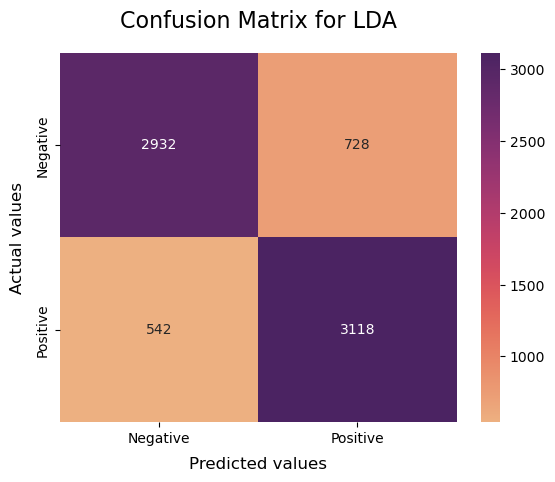

In [144]:
# Printing classification report
print(classification_report(y, ypred_lda))

# Plotting confusion Matrix
cf_matrix = confusion_matrix(y, ypred_lda)
categories = ['Negative','Positive']
sns.heatmap(cf_matrix, annot =True, cmap = 'flare',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':12}, labelpad = 8)
plt.ylabel("Actual values" , fontdict = {'size':12}, labelpad = 8)
plt.title ("Confusion Matrix for LDA", fontdict = {'size':16}, pad = 18)
plt.show()

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Non-Churn Users =1 & Churn Users =0 <br><br> As observed, Overall accuracy is found to be 83 % but Our recall is good for non-churn users & precision is good for churn users. <br> <br> As our major concern is about the customers who churn, thus precision is important to us. </div>

<div class="alert alert-block alert-success">
    <font size=4><font color=#808000><b>
II. LOGISTIC REGRESSION </div>

In [145]:
logreg = LogisticRegression()
model_LR = logreg.fit(X, y)
print("Coeff of model are \n",model_LR.coef_)
print("Intercept of model are \n",model_LR.intercept_)
lr_df1=pd.DataFrame(model_LR.coef_[0].reshape(-1,1),X.columns,columns=["Coeff"])
lr_df2=pd.DataFrame(model_LR.intercept_[0].reshape(-1,1),["Bias"],columns=["Coeff"])
lr_df = pd.concat([lr_df2, lr_df1], axis=0)
print ('\nLogistic Regression Coeff\n')
print(lr_df.sort_values(by=['Coeff'], ascending=False))

Coeff of model are 
 [[-0.20434266 -0.12155001 -0.2368355  -0.48302747  0.22956117  0.23621606
  -2.50131699 -1.49986555 -2.33434054 -2.23448472 -1.73621455 -2.19114016
  -2.38924851 -2.19114016 -2.99399063 -2.2540091  -2.19114016 -2.60405474
  -2.27644531 -2.19114016 -2.44812729 -2.13394701 -2.19114016 -2.84867351
  -1.61863872 -2.19114016 -1.52794311 -1.94280872 -2.19114016 -1.85581352
  -2.39641805 -3.17780996 -3.69690832 -3.28782488 -3.38778204 -2.81627823
  -3.24867244 -4.25729703  1.35746047  2.70542791]]
Intercept of model are 
 [22.87417883]

Logistic Regression Coeff

                                          Coeff
Bias                                  22.874179
TotalCharges                           2.705428
MonthlyCharges                         1.357460
PaperlessBilling                       0.236216
PhoneService                           0.229561
SeniorCitizen                         -0.121550
gender                                -0.204343
Partner                         

C:\Users\archi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Explained in Q2. </div>


Accuracy of Logistic Regression model: 0.83




              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3660
           1       0.82      0.85      0.84      3660

    accuracy                           0.83      7320
   macro avg       0.83      0.83      0.83      7320
weighted avg       0.83      0.83      0.83      7320



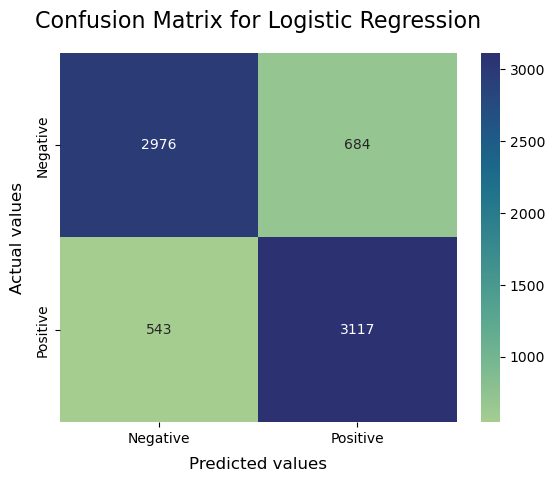

In [146]:
# Accuracy & other metrics of LR

ypred_lr = logreg.predict(X)
y_pred_lr  = pd.DataFrame({"actual":y,"predicted":ypred_lr})
print('\nAccuracy of Logistic Regression model: {:.2f}\n'.format(accuracy_score(y_pred_lr.actual, y_pred_lr.predicted)))

print('\n\n')
# Evaluation of LR
print(classification_report(y, ypred_lr))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y, ypred_lr)
categories = ['Negative','Positive']
sns.heatmap(cf_matrix, annot = True, cmap = 'crest',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':12}, labelpad = 8)
plt.ylabel("Actual values" , fontdict = {'size':12}, labelpad = 8)
plt.title ("Confusion Matrix for Logistic Regression", fontdict = {'size':16}, pad = 18)
plt.show()

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Non-Churn Users =1 & Churn Users =0 <br><br> Over all accuracy is 83 % but Our recall is good for non-churn users & precision is good for churn users. <br> <br> As our major concern are the customers who churn, thus precision of churn users are also important to us, and this LR model is giving better precision. </div>

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>
Q2. <br><br>Comment on the predictive accuracy and the impact of each of the explanatory variables on churn. </div>

In [147]:
# For explanatory variables taking stats Logistic Regression
import statsmodels.api as stm
log_reg = stm.Logit(y, X).fit()
print(log_reg.summary())

         Current function value: 0.378637
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7320
Model:                          Logit   Df Residuals:                     7286
Method:                           MLE   Df Model:                           33
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                  0.4537
Time:                        14:43:40   Log-Likelihood:                -2771.6
converged:                      False   LL-Null:                       -5073.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
gender                                  -0.1727      0.068     -2.556      0.011      -0.305

C:\Users\archi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Checking top 5 & bottom 5 p-values & inferring features </div>

In [148]:
# Checking feature importance on p-value
log_reg.pvalues
a = pd.DataFrame(log_reg.pvalues,columns=['p-value'])
a = a.reset_index()
a.columns = ['Explanatory_Features','p-value']
a.loc[a['p-value']>=0.05,'Sig/Non_Sig']='Not Significant'
a.loc[a['p-value']<0.05,'Sig/Non_Sig']='Significant'

print('SIGNIFICANT FEATURES \n\n',a.nsmallest(5, ['p-value']))
print('\nINSIGNIFICANT FEATURES \n\n',a.nlargest(5, ['p-value']))

SIGNIFICANT FEATURES 

           Explanatory_Features       p-value  Sig/Non_Sig
37                      tenure  7.509229e-32  Significant
17            OnlineBackup_Yes  5.960994e-24  Significant
34            PaymentMethod_CC  1.060550e-18  Significant
36  PaymentMethod_Mailed-Check  3.948495e-18  Significant
32           Contract_Two year  4.653634e-18  Significant

INSIGNIFICANT FEATURES 

                     Explanatory_Features  p-value      Sig/Non_Sig
11                    InternetService_No      1.0  Not Significant
28   StreamingMovies_No internet service      1.0  Not Significant
19  DeviceProtection_No internet service      1.0  Not Significant
25       StreamingTV_No internet service      1.0  Not Significant
22       TechSupport_No internet service      1.0  Not Significant


[Text(0, 0, 'InternetService_No'),
 Text(1, 0, 'StreamingMovies_No internet service'),
 Text(2, 0, 'DeviceProtection_No internet service'),
 Text(3, 0, 'StreamingTV_No internet service'),
 Text(4, 0, 'TechSupport_No internet service')]

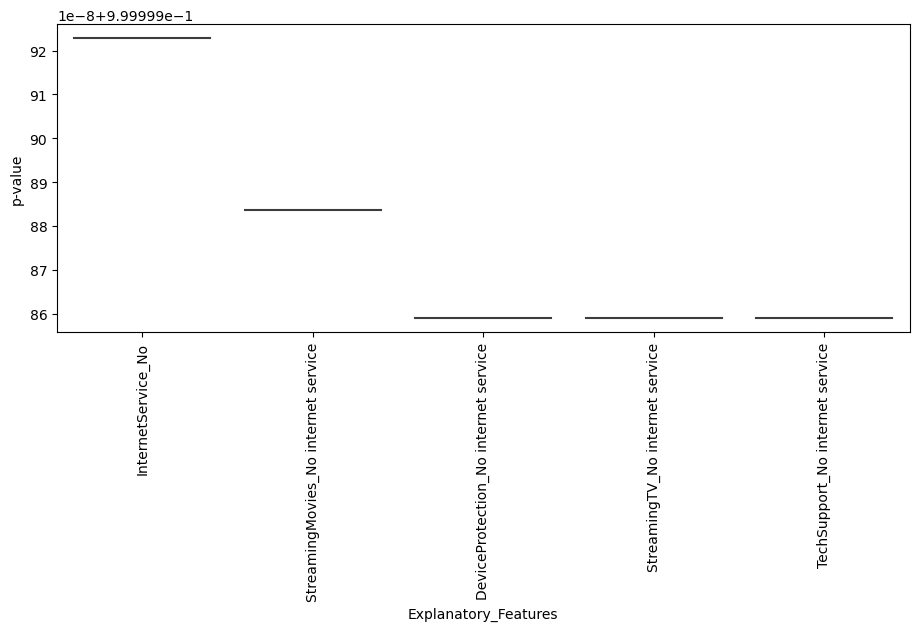

In [149]:
plt.figure(figsize=(11,4))
k=sns.violinplot( x='Explanatory_Features', y='p-value', data=a.nlargest(5, 'p-value') )
k.set_xticklabels(k.get_xticklabels(), rotation=90)

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>We can see that above 5 features are least significant on our LR model predictions as their p-value is very high. No Internet Service and its sub fields are important for Non-CHURN.
</div>

[Text(0, 0, 'tenure'),
 Text(1, 0, 'OnlineBackup_Yes'),
 Text(2, 0, 'PaymentMethod_CC'),
 Text(3, 0, 'PaymentMethod_Mailed-Check'),
 Text(4, 0, 'Contract_Two year')]

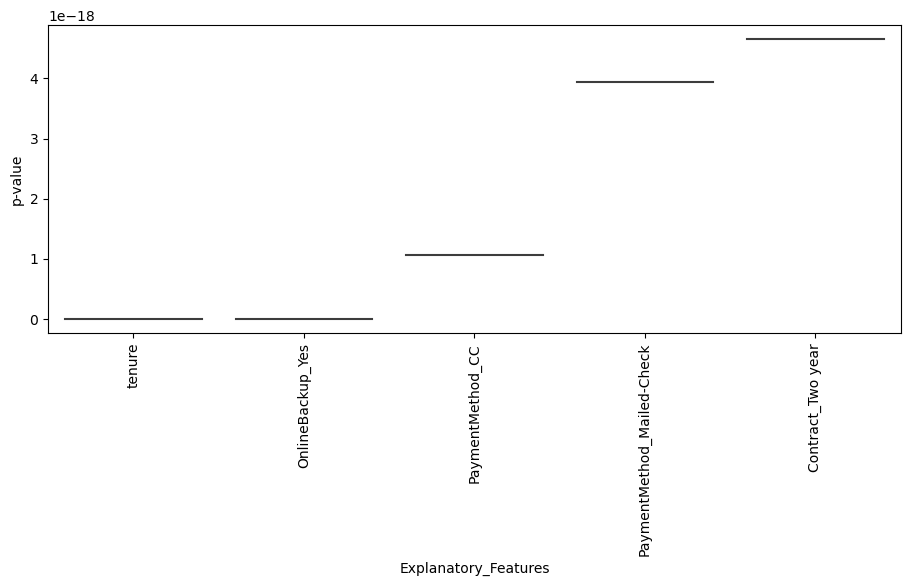

In [150]:
plt.figure(figsize=(11,4))
k=sns.violinplot( x='Explanatory_Features', y='p-value', data=a.nsmallest(5, 'p-value') )
k.set_xticklabels(k.get_xticklabels(), rotation=90)

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>We can see that above 5 features are highly significant on our LR model predictions as their p-value is 0. </div>


<div class="alert alert-block alert-info"><font size=4><font color=#FF4500><b>However checking with their Coeff as well</div>


In [152]:
def feature_weights_top10(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(10,4))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    top_weights_selected.plot(kind="bar")
    return print("")


def feature_weights_bottom10(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    bottom_weights_selected = weights[-5:]
    plt.figure(figsize=(10,4))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 5 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")



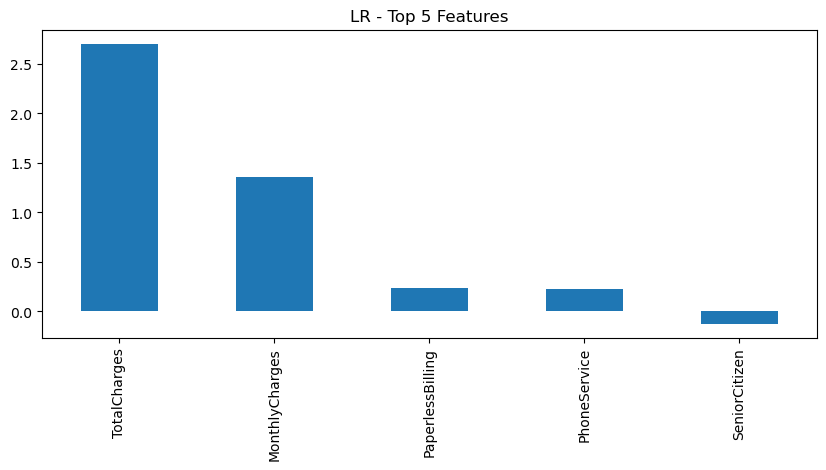

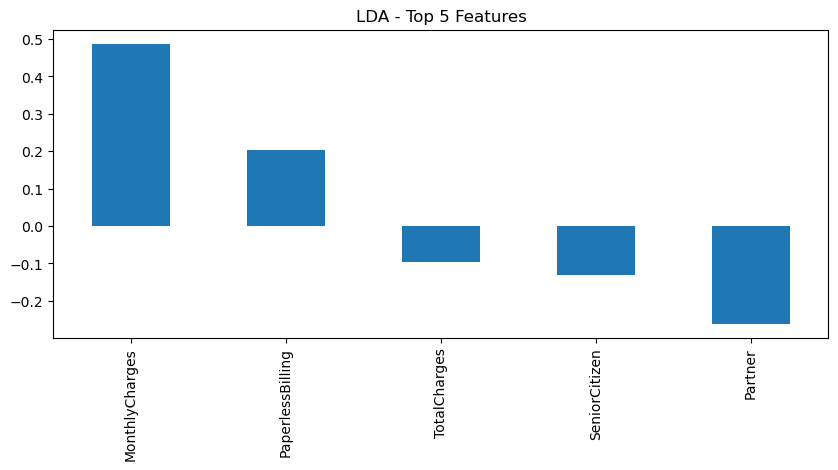

In [153]:
feature_weights_top10(X,logreg,'LR')
feature_weights_top10(X,model_lda,'LDA')


<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>From the above observation, its clear that Top 8 features are same for both the algorithms. Total Charges & Monthly charges are playing major role. </div>

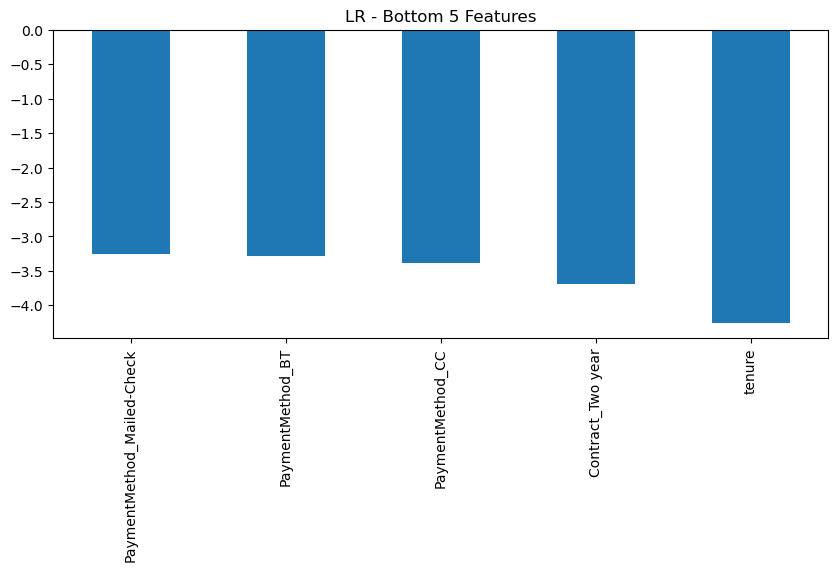

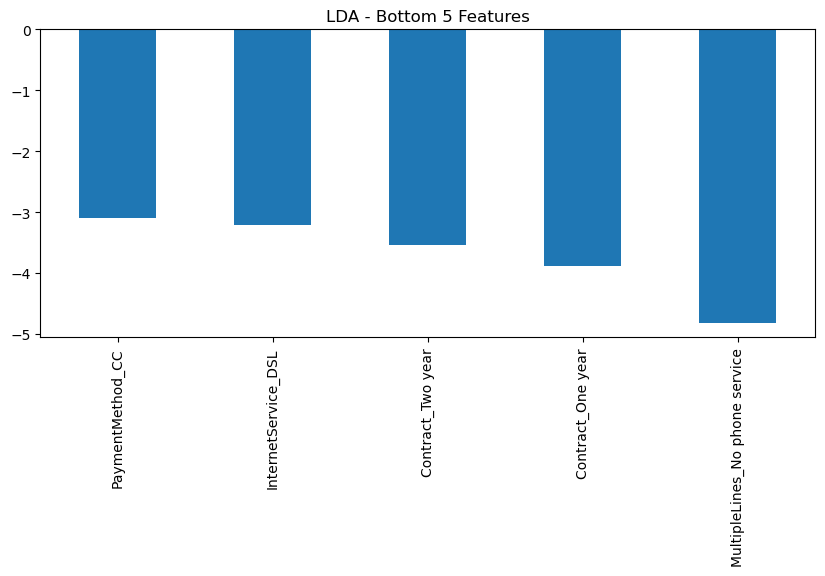

In [154]:
feature_weights_bottom10(X,logreg,'LR')
feature_weights_bottom10(X,model_lda,'LDA')


<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500>Least significant features from both models. <br><br> Again as TOP-10, in bottom-10 features we can see both models have 8/10 common features. The interesting part here is TENURE of customer is not playing any role for it's CHURN or NON-CHURN</div>

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500><b>However feature importance can only be calculated by p-value.<br> We have already checked the confusion matrix parameters in Q1 for both the algorithms. <br>Along with it, we can also conclude for CHURN- monthly charges & for Non-Churn No-internet services are main features for prediction.</div>

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>
Q3. <br><br>Divide all the customers into 3 categories namely Low, Medium and High using the variable “TotalCharges”. Let us call them “Customer Value Segments”. Build prediction models to predict the category/ Value Segment. Comment on the profile of the customers in each category/ Value Segment. Identify appropriate strategies to shift customers from each value segment to the next higher segment. </div>

In [155]:
df.TotalCharges.describe().T

count    4994.000000
mean        0.260237
std         0.261146
min         0.000000
25%         0.042025
50%         0.160411
75%         0.433807
max         1.000000
Name: TotalCharges, dtype: float64

<div class="alert alert-block alert-info">
<font size=4><font color=#FF4500> As observed,
Mean = .26 
50% = .16
Max = 1 
75% = .43 
<br><br> So here we are considering anything below 0.160411 as low, anything between 0.160411 and .433807 as Medium & above 0.433807 as high.</div>

In [156]:
df.loc[df['TotalCharges']>0.433807,'Category']='High'
df.loc[(df['TotalCharges']>0.160411) & (df['TotalCharges']<0.433807),'Category']='Medium'
df.loc[df['TotalCharges']<0.160411,'Category']='Low'
df = pd.DataFrame(df)
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_BT,PaymentMethod_CC,PaymentMethod_E-Check,PaymentMethod_Mailed-Check,tenure,MonthlyCharges,TotalCharges,Category
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0.014085,0.122122,0.004645,Low
1,0,0,1,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0.140845,0.464965,0.081300,Low
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0.000000,0.263764,0.003029,Low
3,1,0,1,0,1,1,0,0,0,1,...,0,1,0,1,0,0,1.000000,0.969469,0.957027,High
4,0,0,0,0,1,1,1,0,0,1,...,0,0,1,0,0,0,0.323944,0.369870,0.159445,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,1,0,0,1,1,1,0,0,1,...,0,0,0,1,0,0,0.323944,0.843343,0.285934,Medium
4997,1,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0.985915,0.587087,0.638276,High
4998,1,0,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0.957746,0.667167,0.678352,High
4999,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1.000000,0.067067,0.195257,Medium


In [157]:
# Checking if any null value in Cateory
df_na = df[df['Category'].isna()]
df_na

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_BT,PaymentMethod_CC,PaymentMethod_E-Check,PaymentMethod_Mailed-Check,tenure,MonthlyCharges,TotalCharges,Category


<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500> No- Null Values </div>
<div class="alert alert-block alert-success">
    <font size=4><font color=#808000><b>
USING MULTICLASS LDA </div>

In [158]:
X_mlda = df.drop("Category", axis=1)
y_mlda = df.Category
X_mlda.shape, y_mlda.shape

((4994, 41), (4994,))

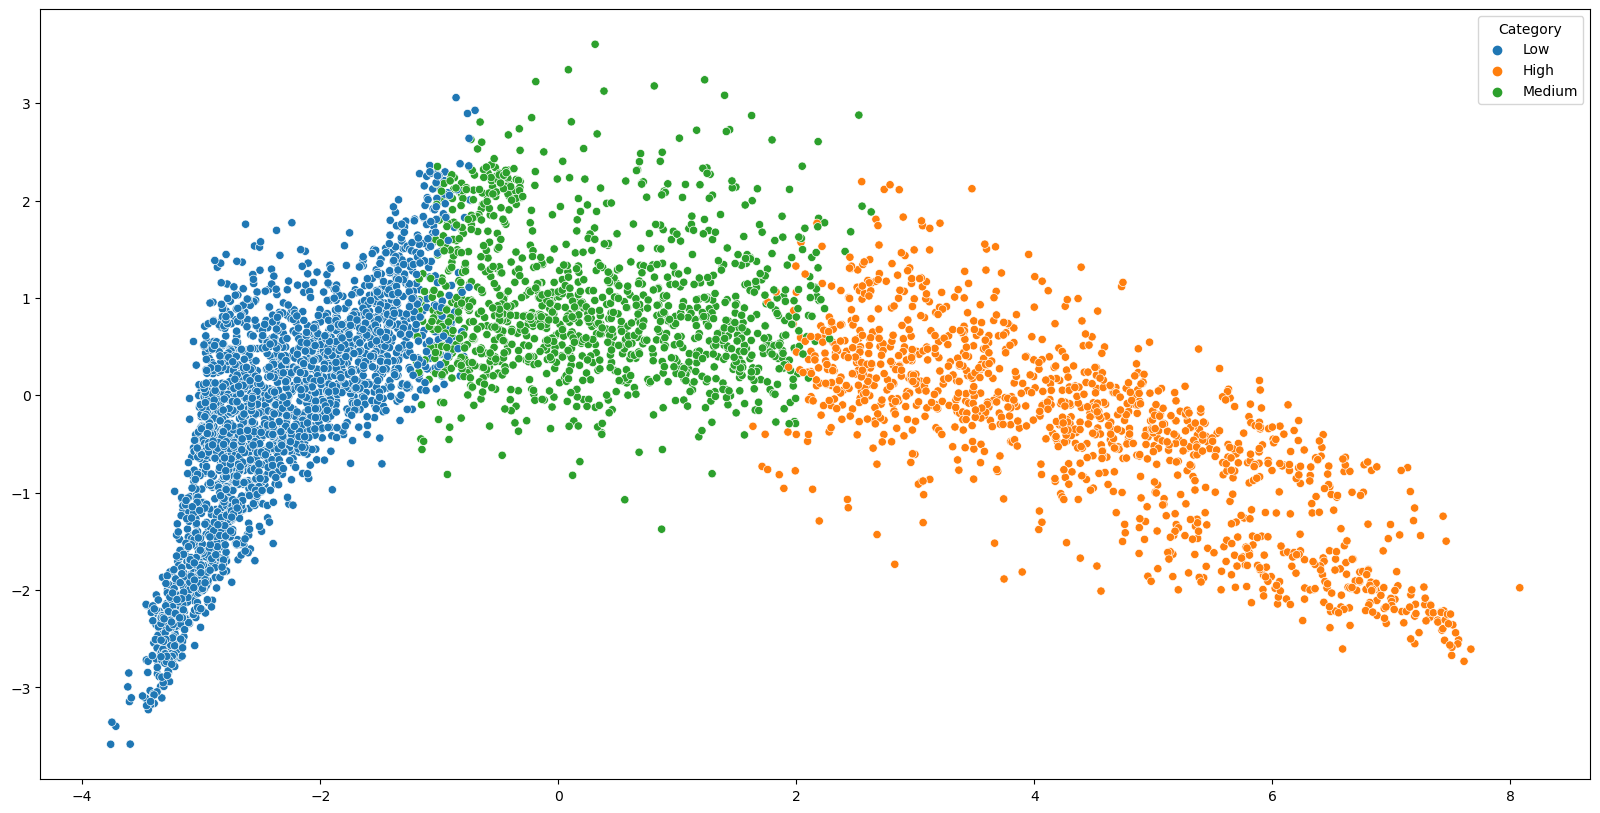

In [159]:
mlda = LinearDiscriminantAnalysis(n_components=2)
m_lda = mlda.fit(X_mlda, y_mlda)
mlda_df = mlda.fit_transform(X_mlda,y_mlda)
# Scatter plot based on multiclass LDA model
plt.figure(figsize=(20,10))
sns.scatterplot(x = mlda_df[:, 0], y = mlda_df[:, 1], hue = df.Category, data=df)
plt.show()

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500> The High category values are more spread across & scattered, however Low category is quite dense. <br><br> There is a very small overlapping between low & medium users and medium & high users. <b><b><b><u> It cleary shows that the user class is quite seperated for high, medium & low with some exceptions. </div>

In [161]:
df_mlda = pd.DataFrame(m_lda.means_.T,X_mlda.columns,columns=["Mean.High","Mean.Low","Mean.Medium"])
df_mlda

,Mean.High,Mean.Low,Mean.Medium
gender,0.493995,0.492591,0.486378
SeniorCitizen,0.210568,0.121346,0.193109
Partner,0.711769,0.339207,0.530449
Dependents,0.352282,0.277133,0.288462
PhoneService,0.967174,0.885863,0.854167
PaperlessBilling,0.699760,0.525831,0.625801
Churn,0.140112,0.348418,0.231571
MultipleLines_No,0.226581,0.662795,0.367788
MultipleLines_No phone service,0.032826,0.114137,0.145833
MultipleLines_Yes,0.740592,0.223068,0.486378


In [253]:
print("\x1B[1;4m TOP 5 High Mean value features are\n\x1B[0m", df_mlda.nlargest(5, ['Mean.High']))
print("\n\x1B[1;4m TOP 5 Medium Mean value features are\n\x1B[0m", df_mlda.nlargest(5, ['Mean.Medium']))
print("\n'\x1B[1;4m TOP 5 Low Mean value features are\n\x1B[0m", df_mlda.nlargest(5, ['Mean.Low']))

print("\n\x1B[1;4m Bottom 5 High Mean value features are\n\x1B[0m", df_mlda.nsmallest(5, ['Mean.High']))
print("\n\x1B[1;4m Bottom 5 Medium Mean value features are\n\x1B[0m", df_mlda.nsmallest(5, ['Mean.Medium']))
print("\n\x1B[1;4m Bottom 5 Low Mean value features are\n\x1B[0m", df_mlda.nsmallest(5, ['Mean.Low']))

 TOP 5 High Mean value features are
                      Mean.High  Mean.Low  Mean.Medium
PhoneService          0.967174  0.885863     0.854167
tenure                0.847213  0.184717     0.538134
StreamingMovies_Yes   0.756605  0.178214     0.441506
MonthlyCharges        0.748382  0.299765     0.505587
StreamingTV_Yes       0.742994  0.183020     0.431891

 TOP 5 Medium Mean value features are
                          Mean.High  Mean.Low  Mean.Medium
PhoneService              0.967174  0.885863     0.854167
PaperlessBilling          0.699760  0.525831     0.625801
TechSupport_No            0.409127  0.508210     0.554487
OnlineSecurity_No         0.436349  0.507409     0.553686
Contract_Month-to-month   0.220176  0.734882     0.540064

' TOP 5 Low Mean value features are
                          Mean.High  Mean.Low  Mean.Medium
PhoneService              0.967174  0.885863     0.854167
Contract_Month-to-month   0.220176  0.734882     0.540064
MultipleLines_No          0.226581  0.6

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500> The HIGH category customers are using fibre optic internet than normal internet & high prone to streaming TV & Movies. It seems they are tech savvy and as they are having year on year subscription, they can be categorised to be High-class.  <br><br> The MEDIUM Category customers are prone to paper less billing along with Contract of Month_to_month i.e. monthly recharge. They consume internet and online services in good amount and hence can be categorised as Middle Class. <br><br> The LOW Category customers are high users of Phone Service along with Multiple line services. They are using very less of OTT (Streaming TV/Movies) and online content. Their tenure is also least. It seems they are economically weak as they use services on need to need basis.<br><br> <u> Better Fiber optic services for medium customers can make them rise to HIGH Category customers. Also for LOW category customers we need to provide more Multiple Line phone services and better resolution at Techsupport to move them up to Medium Category along with affordable and cheaper plan subscriptions.

Accuracy of Multiclass LDA model: 0.94


               precision    recall  f1-score   support

        High       1.00      0.91      0.95      1249
         Low       0.97      0.96      0.96      2497
      Medium       0.84      0.94      0.89      1248

    accuracy                           0.94      4994
   macro avg       0.94      0.94      0.93      4994
weighted avg       0.94      0.94      0.94      4994



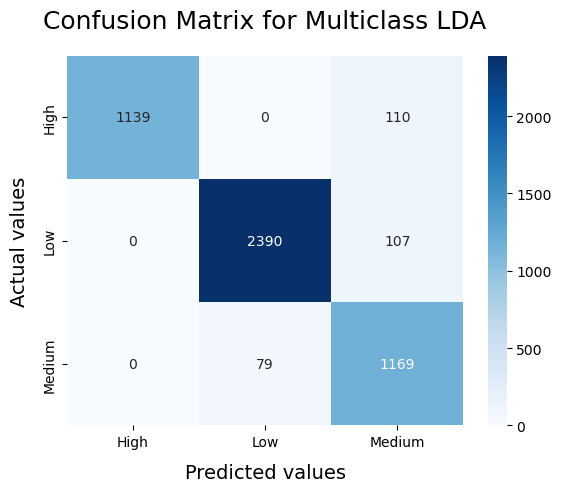

In [163]:
# Metrics of Multiclass Model

ypred_mlda = mlda.predict(X_mlda)
ypred_mlda1  = pd.DataFrame({"actual":y_mlda,
                       "predicted":ypred_mlda})

print('Accuracy of Multiclass LDA model: {:.2f}\n'.format(accuracy_score(ypred_mlda1.actual, ypred_mlda1.predicted)))
print('\n',classification_report(y_mlda, ypred_mlda))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_mlda, ypred_mlda)
cm_df = pd.DataFrame(cf_matrix,
                     index = ['High','Low','Medium'], 
                     columns = ['High','Low','Medium'])
sns.heatmap(cm_df, annot = True, cmap = 'Blues',fmt = '')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix for Multiclass LDA", fontdict = {'size':18}, pad = 20)
plt.show()

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500> The model is very good as it is having very high F1 Score for all 3 categories.

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>
Q4. <br><br>Create an overall survival curve using the Tenure variable. Use Kaplan-Meier method. </div>

In [173]:
from lifelines.statistics import (logrank_test, 
                                  pairwise_logrank_test, 
                                  multivariate_logrank_test, 
                                  survival_difference_at_fixed_point_in_time_test)


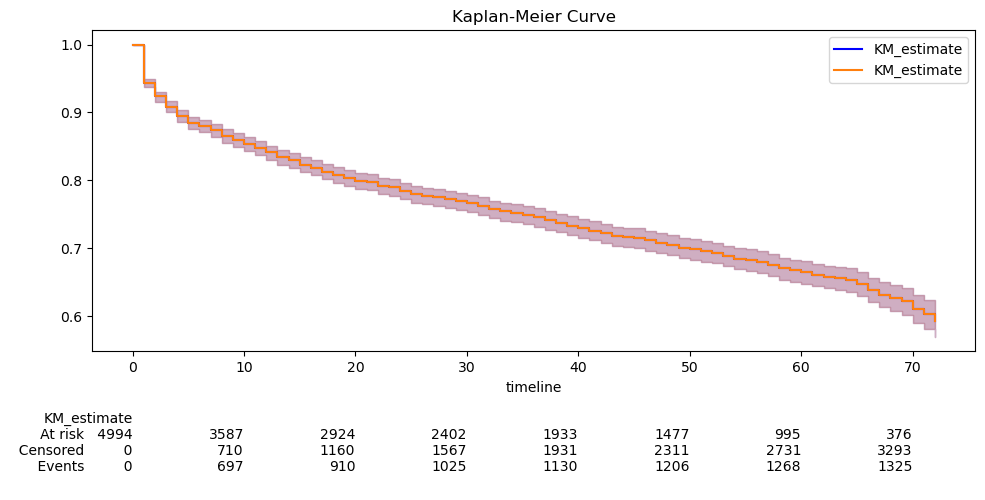

In [184]:
T = df_1['tenure']
E= df_1['Churn']=="Yes"

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
plt.figure(figsize=(10,5))
kmf.plot(color='blue')
kmf.plot(at_risk_counts=True)
plt.title('Kaplan-Meier Curve');


<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500> <br> The survival analysis for 72 months is shown above. <br><br>In the begining of the tenure all 4994 customers are at equivalent risk. <br><br> When our tenure is 10 months of using services, we can find that approx 697/4994 have been churned & there are 710 customers who are not included in the survival analysis calculation. <br><br> In first 10 months we are loosing i.e., Churn users are approx 50% i.e. 697/1325.<br><br> Churn also increases post 5 years of service.

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>
Q5. <br><br>Create separate survival curves for different categories of customers (for example, Gender). Comment on the differences in these survival curves. </div>

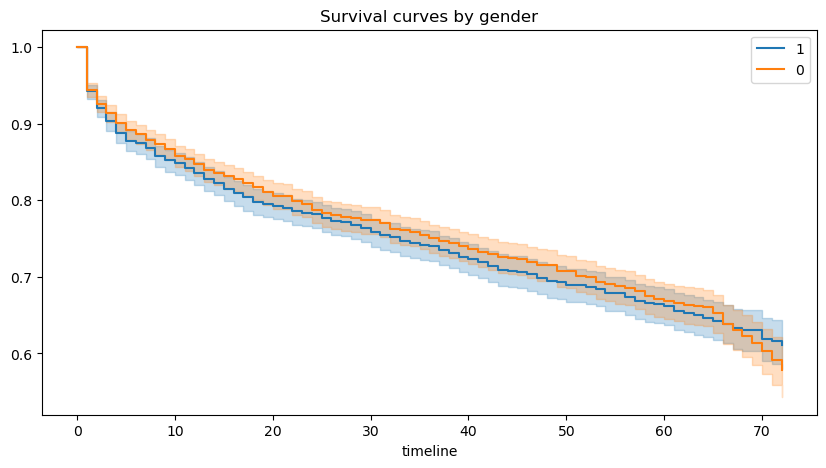

In [185]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
for gender in df_1['gender'].unique():
    
    flag = df_1['gender'] == gender
    
    kmf.fit(T[flag], event_observed=E[flag], label=gender)
    kmf.plot(ax=ax)

plt.title("Survival curves by gender");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>There is high churn rate for males as compared to females in our complete survival tenure except post 65 months.

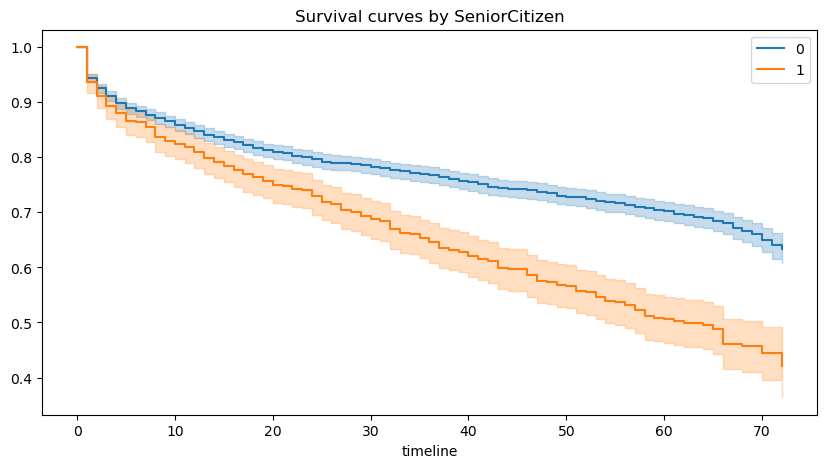

In [197]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for seniorcitiz in df_1['SeniorCitizen'].unique():
    
    flag = df_1['SeniorCitizen'] == seniorcitiz
    
    kmf.fit(T[flag], event_observed=E[flag], label=seniorcitiz)
    kmf.plot(ax=ax)

plt.title("Survival curves by SeniorCitizen");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>Non-Senior citizens are prominent in churning during complete tenure with significantly higher count. The major reason is that the count of senior citizens in our dataset is approx 16%.

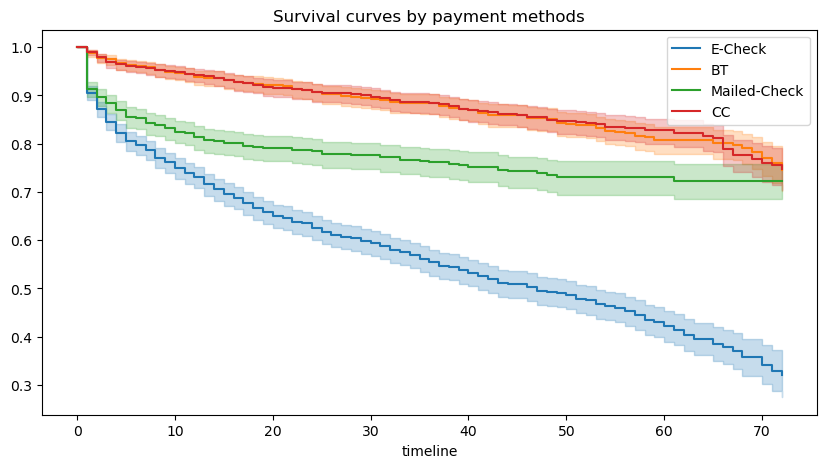

In [198]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for paymentmethod in df_1['PaymentMethod'].unique():
    
    flag = df_1['PaymentMethod'] == paymentmethod
    
    kmf.fit(T[flag], event_observed=E[flag], label=paymentmethod)
    kmf.plot(ax=ax)

plt.title("Survival curves by payment methods");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>The churn of customers over the period is same for customers paying with Balance Transfer & Credit Card. However customers paying with Mailed-Check are also equally churning in oldest months.

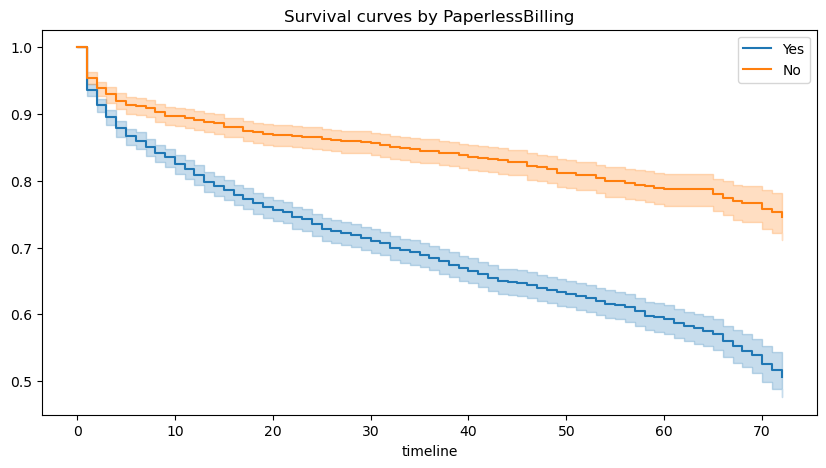

In [199]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for plb in df_1['PaperlessBilling'].unique():
    
    flag = df_1['PaperlessBilling'] == plb
    
    kmf.fit(T[flag], event_observed=E[flag], label=plb)
    kmf.plot(ax=ax)

plt.title("Survival curves by PaperlessBilling");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>The churn of customers over the period is high for non-paper less users.

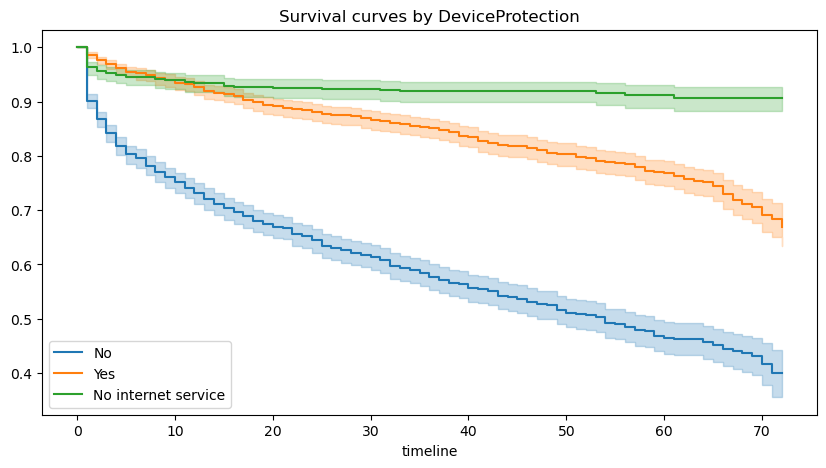

In [200]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for DP in df_1['DeviceProtection'].unique():
    
    flag = df_1['DeviceProtection'] == DP
    
    kmf.fit(T[flag], event_observed=E[flag], label=DP)
    kmf.plot(ax=ax)

plt.title("Survival curves by DeviceProtection");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>Customers who are not using Internet Services device protection are constantly churing at same rate.

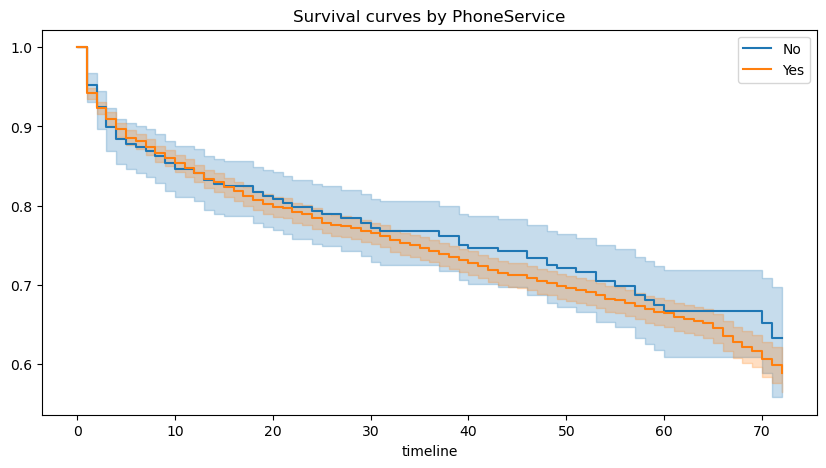

In [209]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for PS in df_1['PhoneService'].unique():
    
    flag = df_1['PhoneService'] == PS
    
    kmf.fit(T[flag], event_observed=E[flag], label=PS)
    kmf.plot(ax=ax)

plt.title("Survival curves by PhoneService");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>The customers with phone services no are churning more since 18 months of service.

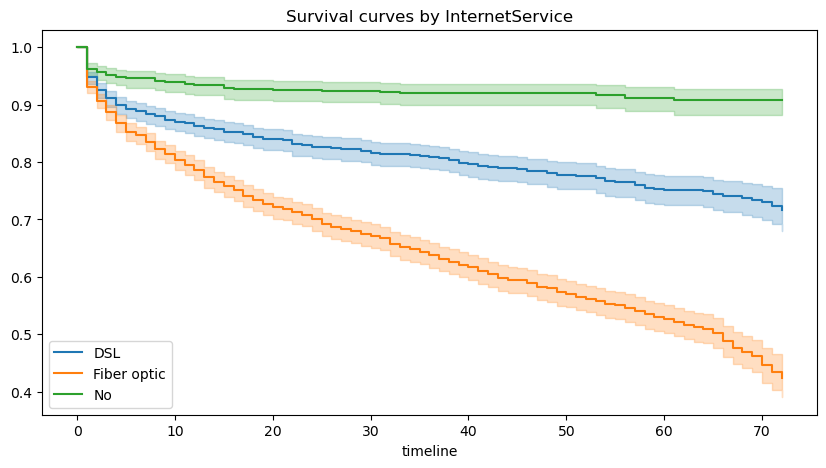

In [208]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for IS in df_1['InternetService'].unique():
    
    flag = df_1['InternetService'] == IS
    
    kmf.fit(T[flag], event_observed=E[flag], label=IS)
    kmf.plot(ax=ax)

plt.title("Survival curves by InternetService");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>The customers No Internet services are churning at constant rate.

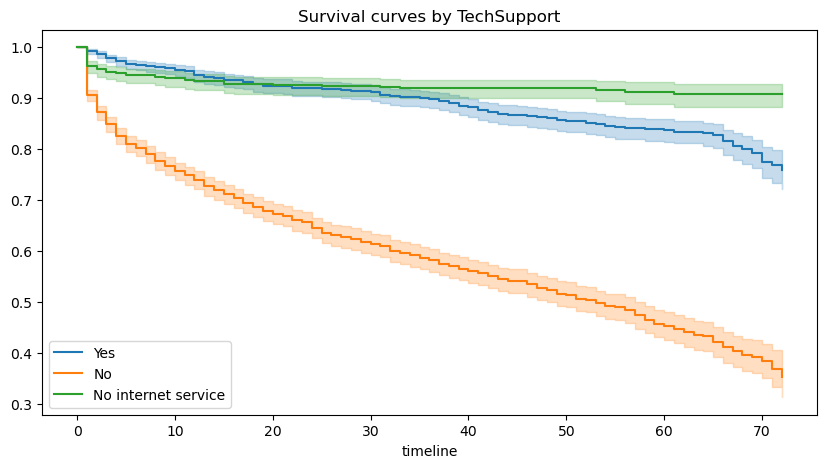

In [213]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for TS in df_1['TechSupport'].unique():
    
    flag = df_1['TechSupport'] == TS
    
    kmf.fit(T[flag], event_observed=E[flag], label=TS)
    kmf.plot(ax=ax)

plt.title("Survival curves by TechSupport");

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>The customers who are using either techsupport via internet services or direct tech support are not satisfied and are churning at constant rate. Except there is some fall in churn for customers using direct tech support.

In [206]:
results = multivariate_logrank_test(df_1['tenure'], df_1['PaymentMethod'], df_1['Churn'])
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         778.84 <0.005    557.34

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500>The p-value for Tenure, Payment method & Churn combined is very less, thus can conclude being major contributor for analysis.

<div class="alert alert-block alert-success"><p class="admonition-title">
    <font size=5><font color=#FF4500>
Q6. <br><br>Build Cox’s Hazard model using appropriate explanatory variables. Comment on the coefficients of the model.</div>

In [274]:
from lifelines import CoxPHFitter
df_3 = df_1[['Partner', 'tenure', 'PhoneService', 'PaperlessBilling','Churn', 'Dependents']]

,Partner,Dependents,Churn,PhoneService,PaperlessBilling,tenure
0,No,No,1,No,Yes,2
1,Yes,Yes,0,Yes,Yes,11
2,No,No,1,Yes,No,1
3,Yes,No,0,Yes,Yes,72
4,No,No,1,Yes,Yes,24
...,...,...,...,...,...,...
4996,No,No,1,Yes,Yes,24
4997,No,No,0,Yes,No,71
4998,No,No,0,Yes,Yes,69
4999,Yes,No,0,Yes,No,72


In [275]:
df_3['Partner'] = df_3['Partner'].map({'Yes': 1, 'No': 0})
df_3['Dependents'] = df_3['Dependents'].map({'Yes': 1, 'No': 0})
df_3['PhoneService'] = df_3['PhoneService'].map({'Yes': 1, 'No': 0})
df_3['PaperlessBilling'] = df_3['PaperlessBilling'].map({'Yes': 1, 'No': 0})


,Partner,Dependents,Churn,PhoneService,PaperlessBilling,tenure
0,0,0,1,0,1,2
1,1,1,0,1,1,11
2,0,0,1,1,0,1
3,1,0,0,1,1,72
4,0,0,1,1,1,24
...,...,...,...,...,...,...
4996,0,0,1,1,1,24
4997,0,0,0,1,0,71
4998,0,0,0,1,1,69
4999,1,0,0,1,0,72


In [276]:
df_4=df_3.query("Churn == 1")

In [277]:
# Using COXPH Model
cph = CoxPHFitter()

# Fitting the data to model
cph.fit(df_4, 'tenure', event_col='Churn')

# Metrics summary
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1334 total observations, 0 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 1334
number of events observed = 1334
   partial log-likelihood = -8204.03
         time fit was run = 2022-11-13 14:30:19 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
Partner           -0.66       0.52       0.06            -0.78            -0.53                 0.46                 0.59
Dependents         0.05       1.05       0.08            -0.10             0.21                 0.91                 1.23
PhoneService      -0.09       0.91       0.09            -0.28             0.09                 0.76                 1.09
PaperlessBilling  -0.17       0.85       0.06            -0.29            -0.04                 0.75                 0.96

                   cmp to      z      p   -log2(p)
covariate                                         
Partner              0.00 -10.45 <0.005      82.47
Dependents           0.00   0.68   0.49       1.02
PhoneService         0.00  -1.00   0.32       1.66
PaperlessBilling     0.00  -2.57   0.01       6.61
---
Concordance = 0.61
Partial AIC = 16416.07
log-likelihood ratio test = 131.73 on 4 df
-log2(p) of ll-ratio test = 88.96

<AxesSubplot:xlabel='log(HR) (95% CI)'>

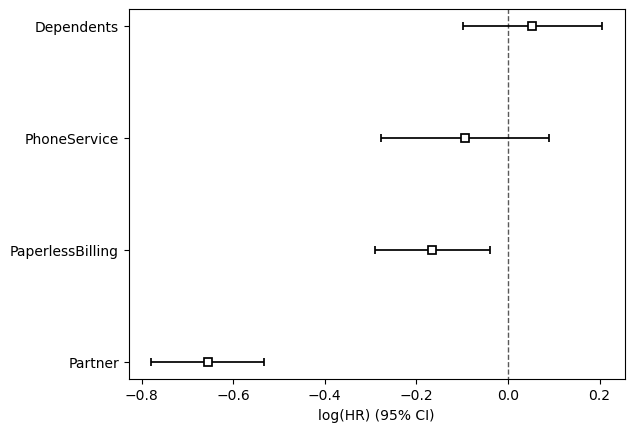

In [278]:
cph.plot()

<div class="alert alert-block alert-info">
    <font size=4><font color=#FF4500> For all 4 features we can see that our coeff is having -ve lower 95% CI & for upper 95% CI only dependent shows a bit higher value. We can conclude that all features are some what providing negative effect to CHURN. However we can also say Dependents are providing some +ve effect on churn. Majorly Partner, Paperless billing is providing complete nrgative effect on Churn & Phoneservices are majorly non-effecting churn.
        
<br><br><u> As we always look for exp(coef) to find whether a feature is important or not in our Target i.e. CHURN. exp(coef) less than 1 means that that feature will not effect CHURN and anything greater than that will effect. In our features only Dependents feature is effecting CHURN.